# Loading files and libraries

In [64]:
import pandas as pd
import numpy as np
import pandas

cc_data_raw = pd.read_csv("cc_data.csv") 
cc_data_raw = cc_data_raw.iloc[:,1:]
cc_data_raw.reset_index(drop = True, inplace = True)

In [65]:
!pip install yellowbrick

In [66]:
## One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

## Train Test Stratified Splitting
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

## Feature Scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

## Model Train and Testing
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

## PCA
from sklearn.decomposition import PCA, KernelPCA

# Feature Selection
from sklearn.feature_selection import RFE

## Smote
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import SMOTENC

## Undersample Majority 
from sklearn.utils import resample
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from yellowbrick.model_selection import RFECV

# Lime
from lime import lime_tabular

# stats
from scipy.stats import randint
from scipy.stats import loguniform

# Feature Engineering (new variables)



In [67]:
cc_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36105 entries, 0 to 36104
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36105 non-null  int64  
 1   CNT_CHILDREN         36105 non-null  int64  
 2   AMT_INCOME_TOTAL     36105 non-null  float64
 3   NAME_INCOME_TYPE     36105 non-null  object 
 4   NAME_EDUCATION_TYPE  36105 non-null  object 
 5   NAME_FAMILY_STATUS   36105 non-null  object 
 6   NAME_HOUSING_TYPE    36105 non-null  object 
 7   DAYS_BIRTH           36105 non-null  int64  
 8   DAYS_EMPLOYED        36105 non-null  int64  
 9   FLAG_MOBIL           36105 non-null  int64  
 10  FLAG_WORK_PHONE      36105 non-null  int64  
 11  FLAG_PHONE           36105 non-null  int64  
 12  FLAG_EMAIL           36105 non-null  int64  
 13  OCCUPATION_TYPE      36105 non-null  object 
 14  CNT_FAM_MEMBERS      36105 non-null  float64
 15  Gender               36105 non-null 

In [68]:
cc_data_raw.head()

ID  CNT_CHILDREN  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0  5008804             0          427500.0               Working   
1  5008805             0          427500.0               Working   
2  5008806             0          112500.0               Working   
3  5008808             0          270000.0  Commercial associate   
4  5008809             0          270000.0  Commercial associate   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education        Civil marriage   Rented apartment   
1               Higher education        Civil marriage   Rented apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  \
0      -12005          -4542           1                1           0   
1      -12005          -4542           1                1           0   
2      -21474          -1134           1                0           0   
3      -19110          -3051           1                0           1   
4      -19110          -3051           1                0           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  Gender  Has_Car  Has_Realty  \
0           0         Unknown              2.0       1        1           1   
1           0         Unknown              2.0       1        1           1   
2           0  Security staff              2.0       1        1           1   
3           1     Sales staff              1.0       0        0           1   
4           1     Sales staff              1.0       0        0           1   

   REALTYPE  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0

We believe that some of these variables are crucial in telling us whether a person should be given a credit card loan. Hence, we engineered these features from our domain knowledge.


In [69]:
cc_data_raw["Has_Job"] = cc_data_raw['NAME_INCOME_TYPE'].replace(["Working","Commercial associate","State servant","Pensioner","Student"],[1,1,1,0,0])

cc_data_raw["Has_Own_Housing"] = cc_data_raw["NAME_HOUSING_TYPE"].replace(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'], [1, 1, 1, 0, 1, 1])

cc_data_raw["Attached_Relationship"] = cc_data_raw["NAME_FAMILY_STATUS"].replace(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], [1, 1, 0, 0, 0])

cc_data_raw["Pass_Relationship"] = cc_data_raw["NAME_FAMILY_STATUS"].replace(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], [0, 0, 0, 1, 1])

Conversion of negative values to positive value & getting days in terms of years

In [70]:
cc_data_raw["Years_Employed"] = np.maximum(round(-cc_data_raw.DAYS_EMPLOYED/365, 0), 0)
cc_data_raw["Age_More_Than"] = np.maximum(round(-cc_data_raw.DAYS_BIRTH/365, 0), 0)

In [71]:
cc_data_raw.head()

ID  CNT_CHILDREN  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0  5008804             0          427500.0               Working   
1  5008805             0          427500.0               Working   
2  5008806             0          112500.0               Working   
3  5008808             0          270000.0  Commercial associate   
4  5008809             0          270000.0  Commercial associate   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education        Civil marriage   Rented apartment   
1               Higher education        Civil marriage   Rented apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  ...  Gender  Has_Car  Has_Realty  \
0      -12005          -4542           1  ...       1        1           1   
1      -12005          -4542           1  ...       1        1           1   
2      -21474          -1134           1  ...       1        1           1   
3      -19110          -3051           1  ...       0        0           1   
4      -19110          -3051           1  ...       0        0           1   

  REALTYPE  Has_Job  Has_Own_Housing  Attached_Relationship  \
0      0.0        1                1                      1   
1      0.0        1                1                      1   
2      0.0        1                1                      1   
3      0.0        1                1                      0   
4      0.0        1                1                      0   

   Pass_Relationship  Years_Employed  Age_More_Than  
0                  0            12.0           33.0  
1                  0            12.0           33.0  
2                  0             3.0           59.0  
3                  0             8.0           52.0  
4                  0             8.0           52.0  

[5 rows x 25 columns]

# Removing irrelevant variables

In [72]:
corr = cc_data_raw.corr()
corr.style.background_gradient(cmap='coolwarm')

/opt/homebrew/lib/python3.10/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/homebrew/lib/python3.10/site-packages/pandas/io/formats/style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In the above plot, we see that quite a number of variables being highly correlated with each other, which might affect our model explainability and logistic regression

In [73]:
cc_data_raw.drop("DAYS_EMPLOYED", axis = 1, inplace = True) # 1 for column, with inplace no need to redefine df
cc_data_raw.drop("DAYS_BIRTH", axis = 1, inplace = True)
cc_data_raw.drop("ID", axis = 1, inplace = True)

Columns here are removed as they do not serve any meaningful conclusion if an individual should be given a credit card loan or not

In [74]:
cc_data_raw.drop("CNT_CHILDREN", axis = 1, inplace = True)
cc_data_raw.drop("FLAG_MOBIL", axis = 1, inplace = True)
cc_data_raw.drop("FLAG_WORK_PHONE", axis = 1, inplace = True)
cc_data_raw.drop("FLAG_PHONE", axis = 1, inplace = True)
cc_data_raw.drop("FLAG_EMAIL", axis = 1, inplace = True)

In [75]:
cc_data_raw.columns

Index(['AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'Gender', 'Has_Car', 'Has_Realty', 'REALTYPE',
       'Has_Job', 'Has_Own_Housing', 'Attached_Relationship',
       'Pass_Relationship', 'Years_Employed', 'Age_More_Than'],
      dtype='object')

In [76]:
cc_data_raw.head()

AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0        Civil marriage   Rented apartment         Unknown              2.0   
1        Civil marriage   Rented apartment         Unknown              2.0   
2               Married  House / apartment  Security staff              2.0   
3  Single / not married  House / apartment     Sales staff              1.0   
4  Single / not married  House / apartment     Sales staff              1.0   

   Gender  Has_Car  Has_Realty  REALTYPE  Has_Job  Has_Own_Housing  \
0       1        1           1       0.0        1                1   
1       1        1           1       0.0        1                1   
2       1        1           1       0.0        1                1   
3       0        0           1       0.0        1                1   
4       0        0           1       0.0        1                1   

   Attached_Relationship  Pass_Relationship  Years_Employed  Age_More_Than  
0                      1                  0            12.0           33.0  
1                      1                  0            12.0           33.0  
2                      1                  0             3.0           59.0  
3                      0                  0             8.0           52.0  
4                      0                  0             8.0           52.0

# One Hot Encoding for categorical data

In [77]:
cc_data_ohe = cc_data_raw.copy()

cateogorical_list = ['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

for col in cateogorical_list:

    holder = cc_data_ohe[col].values.reshape(-1, 1)

    onehot_encoder = OneHotEncoder(sparse=False)

    temp = pd.DataFrame(onehot_encoder.fit_transform(holder))

    temp.columns = onehot_encoder.get_feature_names_out([col])

    cc_data_ohe = cc_data_ohe.join(temp)

cc_data_ohe.drop("NAME_EDUCATION_TYPE", axis = 1, inplace = True)
cc_data_ohe.drop("OCCUPATION_TYPE", axis = 1, inplace = True)
cc_data_ohe.drop("NAME_INCOME_TYPE", axis = 1, inplace = True)
cc_data_ohe.drop("NAME_FAMILY_STATUS", axis = 1, inplace = True)
cc_data_ohe.drop("NAME_HOUSING_TYPE", axis = 1, inplace = True)

In [78]:
print(cc_data_ohe.shape)

(36105, 52)


# Train-Test Split: 80-20, Stratified

In [79]:
y = cc_data_ohe[["REALTYPE"]] # array of labels

X = cc_data_ohe.copy()
X.drop("REALTYPE", axis = 1, inplace = True) # array of features

In [80]:
trng_X, test_X, trng_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 3244, stratify = y) 

In [81]:
print(np.unique(y, return_counts = True))
print(np.unique(trng_y, return_counts = True))
print(np.unique(test_y, return_counts = True))

(array([0., 1.]), array([35841,   264]))
(array([0., 1.]), array([28673,   211]))
(array([0., 1.]), array([7168,   53]))


In [82]:
trng_data = trng_y.join(trng_X)
test_data = test_y.join(test_X)

In [83]:
print(len(trng_data)) # num of obs for training
print(len(test_data)) # num of obs for testing

28884
7221


In [84]:
trng_data = trng_data.reset_index()
trng_data = trng_data.drop(['index'], axis=1)

test_data = test_data.reset_index()
test_data = test_data.drop(['index'], axis=1)

trng_X = trng_X.reset_index()
trng_X = trng_X.drop(['index'], axis=1)

trng_y = trng_y.reset_index()
trng_y = trng_y.drop(['index'], axis=1)

test_y = test_y.reset_index()
test_y = test_y.drop(['index'], axis=1)

test_X = test_X.reset_index()
test_X = test_X.drop(['index'], axis=1)

# Data scaling (for basic Logistic Regression, PCA, SMOTE)

We are using StandardScaler here 'Furthermore, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values.' from "Python Machine Learning" by Raschka, Page 111

Logistic regresssion is particularly affected by unscaled data as it uses gradient descent, where the relateive scale of dimensions of the input will affect the model.

In [85]:
## data normalisation - new_x = (x – min) / (max – min)
trans = StandardScaler()
X_train_scaled = trans.fit_transform(trng_X)
X_test_scaled = trans.transform(test_X)
y_train = trng_y
y_test = test_y

In [86]:
## no scaling
X_train = trng_X
X_test = test_X
y_train = trng_y
y_test = test_y

# RepeatedStratifiedKFold & Scoring

Best evaluation for very imbalanced datasets!

In [87]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [88]:
scoring = {'Accuracy': 'accuracy',
           'Precision': 'precision',
           'Recall': 'recall',
           "F1 Score": 'f1',
           "Roc_Auc": 'roc_auc'}

# Basic Log Reg 


In [89]:
clf = LogisticRegression(random_state = 3244)

pipeline = make_pipeline(clf)

scores = cross_validate(pipeline, X_train_scaled, y_train.values.ravel(), scoring=scoring, cv=cv, n_jobs=-1)

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision 

In [90]:
print('Accuracy', np.mean(scores['test_Accuracy']))
print('Precision', np.mean(scores['test_Precision']))
print('Recall', np.mean(scores['test_Recall']))
print('F1', np.mean(scores['test_F1 Score']))
print('Roc_Auc', np.mean(scores['test_Roc_Auc']))


Accuracy 0.9926949245825939
Precision 0.0
Recall 0.0
F1 0.0
Roc_Auc 0.5830113566267324


Oh no, all metrics here are pretty bad, it is likely due to the class imbalance. Let's try some class weightage.

# Log Reg with class weights = {0:0.01, 1:1}

In [91]:
y_train.value_counts()

REALTYPE
0.0         28673
1.0           211
dtype: int64

In [92]:
# 0.0: 28673    1.0: 211    Since there is roughly 100 times more 0.0 than 1.0, we shall assign the weights of 1.0 to be 100 times more than 0.0
weights = {0:0.01, 1:1}

clf = LogisticRegression(random_state = 3244, class_weight=weights)

pipeline = make_pipeline(clf)

scores = cross_validate(pipeline, X_train_scaled, y_train.values.ravel(), scoring=scoring, cv=cv, n_jobs=-1)

In [93]:
print('Accuracy', np.mean(scores['test_Accuracy']))
print('Precision', np.mean(scores['test_Precision']))
print('Recall', np.mean(scores['test_Recall']))
print('F1', np.mean(scores['test_F1 Score']))
print('Roc_Auc', np.mean(scores['test_Roc_Auc']))

Accuracy 0.7918568282212883
Precision 0.010964539896514242
Recall 0.30656565656565654
F1 0.021169217195498257
Roc_Auc 0.5898137319437156


The metrics have improved! But it seems like we can do better with another model that fully utilises weights to improve our model. Of course it is Adaboost, where for each iteration, 
the weights of misclassified instances are given more weight which causes the subsequent weak classifiers to focus more on these difficult to classsify cases.

# Basic AdaBoost

In [94]:
# Here, we are not using X_train_scaled because Adaboost utilises decision trees, which are not affected by unscaled data

basic_abc = AdaBoostClassifier()

pipeline = make_pipeline(basic_abc)

scores = cross_validate(pipeline, X_train, y_train.values.ravel(), scoring=scoring, cv=cv, n_jobs=-1)

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision 

In [95]:
print('Accuracy', np.mean(scores['test_Accuracy']))
print('Precision', np.mean(scores['test_Precision']))
print('Recall', np.mean(scores['test_Recall']))
print('F1', np.mean(scores['test_F1 Score']))
print('Roc_Auc', np.mean(scores['test_Roc_Auc']))

Accuracy 0.9926949245825939
Precision 0.0
Recall 0.0
F1 0.0
Roc_Auc 0.5810127329337962


Pretty bad recall and precision here! 

# AdaBoost with DT Stump (Adaboost-DT)


Before starting to explain about algorithms itself, we first need to choose a base classifier for ensembles. It has been shown that ensembles with unstable classifiers outperform ensembles with stable classifiers. thus we use DecisionTree rather than SVM. Unstable classifiers allow for incorporation of a higher effect of bias-variance change. This is due to Adaboost's boosting methods.

Decision trees overfit fully with zero training set error and have high variance while having no learning biases. Thus, we need simpler trees. Decreasing depth could help us! 
So if we have a huge number of weak classifiers that have good generalization but not fitted well, these weak classifiers can perform better in ensembles.

We can then change the BASE_ESTIMATOR, N_ESTTIMATOR, LEARNING_RATE, RANDOM_STATE

base_estimator: The model to the ensemble, the default is a decision tree.

n_estimators: Number of models to be built.

learning_rate: shrinks the contribution of each classifier by this value.

random_state: The random number seed, so that the same random numbers generated every time.

In [137]:
weights = {0:0.2, 1:1}

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                "base_estimator__splitter" :   ["best", "random"],
                "base_estimator__max_features": randint(1, 9),
                "base_estimator__min_samples_leaf": randint(1, 9),
                "base_estimator__max_depth" : [2,4,6,8,10,12],
                "n_estimators": [1, 2, 5, 10],
                "learning_rate": loguniform(1e-3, 100)
            }

dtc = DecisionTreeClassifier(random_state = 3244, max_features = "auto", class_weight = weights)

dtc_abc = AdaBoostClassifier(random_state=3244, base_estimator = dtc)

simple_random_search_abc = RandomizedSearchCV(dtc_abc, param_grid, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'], n_jobs=-1, cv=cv, random_state=3244, refit='roc_auc')

result = simple_random_search_abc.fit(X_train, y_train.values.ravel())

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision 

In [138]:
cv_results = pd.DataFrame(result.cv_results_)
max = cv_results['mean_test_roc_auc'].argmax()

print('Best Hyperparameters: %s' % result.best_params_)

print('Accuracy', cv_results['mean_test_accuracy'][max])
print('Precision', cv_results['mean_test_precision'][max])
print('Recall', cv_results['mean_test_recall'][max])
print('F1', cv_results['mean_test_f1'][max])
print('Roc_Auc', cv_results['mean_test_roc_auc'][max])

Best Hyperparameters: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 10, 'base_estimator__max_features': 6, 'base_estimator__min_samples_leaf': 7, 'base_estimator__splitter': 'best', 'learning_rate': 0.14047694704063493, 'n_estimators': 10}
Accuracy 0.9913677968490665
Precision 0.30491129241129244
Recall 0.1121212121212121
F1 0.16010501477038944
Roc_Auc 0.677244261518841


Recall and Precision has improved! Can we do better by moving the highly correlated variables using PCA?

# PCA for X_train_scaled

Since we haave many dimensions, it would be best to reduce the dimensions using PCA. That will reduce the model's complexity and also remove some noise in the data. In this way, dimensionality reduction helps to mitigate overfitting. To get rid of the correlation problem too!

In [98]:
components = None
pca = KernelPCA(n_components = 20, kernel="rbf", degree = 2)
pca.fit(X_train_scaled)

# print percentage of variance explained by each principal component
# print(f"Variances (Percentage): {pca.explained_variance_ratio_ * 100}")

# # print cumsum percentage of variance 
# print(f"Cumulative Variances (Percentage): {pca.explained_variance_ratio_.cumsum() * 100}")

# # scree plot
# components = len(pca.explained_variance_ratio_) \
# if components is None else components
# plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
# plt.xlabel("Number of components")
# plt.ylabel("Explained variance (%)")

KernelPCA(degree=2, kernel='rbf', n_components=20)

Fitting X_train_scaled to PCA to obtain PCA output. Here, we want 80% of variance to prevent overfitting and to reduce noise in our dataset

In [99]:
# pca = PCA(n_components = 0.8)
# pca.fit(X_train_scaled)

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [116]:
normal_pca = PCA(n_components = 0.8)
normal_pca.fit(X_train_scaled)

X_train_scaled_normpca = normal_pca.transform(X_train_scaled)
X_test_scaled_normpca = normal_pca.transform(X_test_scaled)

# RFE for X_train_scaled

In [140]:
dtc = DecisionTreeClassifier(random_state = 3244, class_weight = weights,
    criterion = 'entropy', max_depth = 10, max_features = 6, min_samples_leaf = 7, splitter = 'best')

regressor = AdaBoostClassifier(random_state=3244, base_estimator = dtc, learning_rate = 0.14047694704063493, n_estimators = 10)

cv_for_rfe = StratifiedKFold(5)

# Step 5 to make it run faster
visualizer = RFECV(regressor, cv=cv_for_rfe, scoring='roc_auc', step=3, min_features_to_select = 10)

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


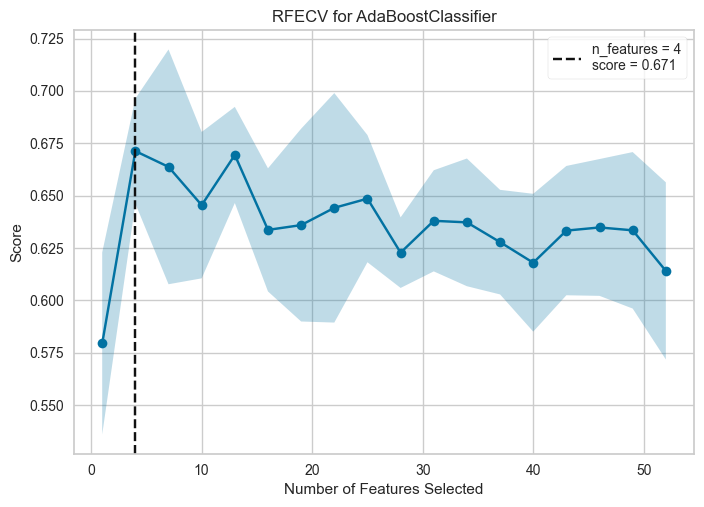

<AxesSubplot: title={'center': 'RFECV for AdaBoostClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [141]:
visualizer.fit(X_train_scaled, y_train)        # Fit the data to the visualizer
visualizer.show() 

In [142]:
T = [X_train.columns.tolist()[i] for i in range(len(visualizer.ranking_.tolist())) if visualizer.ranking_.tolist()[i] == 1]

In [143]:
print('Features Selected are: ', T)

Features Selected are:  ['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'Years_Employed', 'Age_More_Than']


In [144]:
X_train_scaled_rfe = pd.DataFrame(visualizer.transform(X_train_scaled), columns=T)

In [151]:
X_test_scaled_rfe = pd.DataFrame(visualizer.transform(X_test_scaled), columns=T)

# Adaboost-DT + RFE


In [145]:
weights = {0:0.2, 1:1}

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                "base_estimator__splitter" :   ["best", "random"],
                "base_estimator__max_features": randint(1, 9),
                "base_estimator__min_samples_leaf": randint(1, 9),
                "base_estimator__max_depth" : [2,4,6,8,10,12],
                "n_estimators": [1, 2, 5, 10],
                "learning_rate": loguniform(1e-3, 100)
            }

dtc = DecisionTreeClassifier(random_state = 3244, max_features = "auto", class_weight = weights)

dtc_abc = AdaBoostClassifier(random_state=3244, base_estimator = dtc)

rfe_random_search_abc = RandomizedSearchCV(dtc_abc, param_grid, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'], n_jobs=-1, cv=cv, random_state=3244, refit='roc_auc')

result_rfe = rfe_random_search_abc.fit(X_train_scaled_rfe, y_train.values.ravel())

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision 

In [146]:
cv_results = pd.DataFrame(result_rfe.cv_results_)
max = cv_results['mean_test_roc_auc'].argmax()

print('Best Hyperparameters: %s' % result_rfe.best_params_)

print('Accuracy', cv_results['mean_test_accuracy'][max])
print('Precision', cv_results['mean_test_precision'][max])
print('Recall', cv_results['mean_test_recall'][max])
print('F1', cv_results['mean_test_f1'][max])
print('Roc_Auc', cv_results['mean_test_roc_auc'][max])

Best Hyperparameters: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 10, 'base_estimator__max_features': 6, 'base_estimator__min_samples_leaf': 7, 'base_estimator__splitter': 'best', 'learning_rate': 0.14047694704063493, 'n_estimators': 10}
Accuracy 0.9869939492525378
Precision 0.18270564513205034
Recall 0.2240981240981241
F1 0.1992988749214916
Roc_Auc 0.6831921535695579


Our roc_auc is could be improved, knowing that there is high correlation between certain variables! (as seen in our correlation plot as above). Hence let us apply PCA to our data

# Adaboost-DT + KernelPCA

In [100]:
weights = {0:0.2, 1:1}

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                "base_estimator__splitter" :   ["best", "random"],
                "base_estimator__max_features": randint(1, 9),
                "base_estimator__min_samples_leaf": randint(1, 9),
                "base_estimator__max_depth" : [2,4,6,8,10,12],
                "n_estimators": [1, 2, 5, 10],
                "learning_rate": loguniform(1e-3, 100)
            }

dtc = DecisionTreeClassifier(random_state = 3244, max_features = "auto", class_weight = weights)

dtc_abc = AdaBoostClassifier(random_state=3244, base_estimator = dtc)

random_search_abc = RandomizedSearchCV(dtc_abc, param_grid, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'], n_jobs=-1, cv=cv, random_state=3244, refit='roc_auc')

result_pca = random_search_abc.fit(X_train_scaled_pca, y_train.values.ravel())

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision 

In [104]:
cv_results = pd.DataFrame(result_pca.cv_results_)
max = cv_results['mean_test_roc_auc'].argmax()

print('Best Hyperparameters: %s' % result_pca.best_params_)

print('Accuracy', cv_results['mean_test_accuracy'][max])
print('Precision', cv_results['mean_test_precision'][max])
print('Recall', cv_results['mean_test_recall'][max])
print('F1', cv_results['mean_test_f1'][max])
print('Roc_Auc', cv_results['mean_test_roc_auc'][max])

Best Hyperparameters: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 10, 'base_estimator__max_features': 6, 'base_estimator__min_samples_leaf': 7, 'base_estimator__splitter': 'best', 'learning_rate': 0.14047694704063493, 'n_estimators': 10}
Accuracy 0.9882287448778072
Precision 0.23235175053991244
Recall 0.25887445887445887
F1 0.24144323040108906
Roc_Auc 0.6964796505677407


# Adaboost-DT + PCA

In [117]:
weights = {0:0.2, 1:1}

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                "base_estimator__splitter" :   ["best", "random"],
                "base_estimator__max_features": randint(1, 9),
                "base_estimator__min_samples_leaf": randint(1, 9),
                "base_estimator__max_depth" : [2,4,6,8,10,12],
                "n_estimators": [1, 2, 5, 10],
                "learning_rate": loguniform(1e-3, 100)
            }

dtc = DecisionTreeClassifier(random_state = 3244, max_features = "auto", class_weight = weights)

dtc_abc = AdaBoostClassifier(random_state=3244, base_estimator = dtc)

random_search_abc = RandomizedSearchCV(dtc_abc, param_grid, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'], n_jobs=-1, cv=cv, random_state=3244, refit='roc_auc')

result_pca = random_search_abc.fit(X_train_scaled_normpca, y_train.values.ravel())

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision 

In [118]:
cv_results = pd.DataFrame(result_pca.cv_results_)
max = cv_results['mean_test_roc_auc'].argmax()

print('Best Hyperparameters: %s' % result_pca.best_params_)

print('Accuracy', cv_results['mean_test_accuracy'][max])
print('Precision', cv_results['mean_test_precision'][max])
print('Recall', cv_results['mean_test_recall'][max])
print('F1', cv_results['mean_test_f1'][max])
print('Roc_Auc', cv_results['mean_test_roc_auc'][max])

Best Hyperparameters: {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 12, 'base_estimator__max_features': 7, 'base_estimator__min_samples_leaf': 7, 'base_estimator__splitter': 'best', 'learning_rate': 0.05903836178189057, 'n_estimators': 1}
Accuracy 0.9861976941862773
Precision 0.14009583640954107
Recall 0.17207792207792202
F1 0.1524335242115973
Roc_Auc 0.675573973102041


# Adaboost-DT + KernelPCA + RFE



In [105]:
dtc = DecisionTreeClassifier(random_state = 3244, class_weight = weights,
    criterion = 'entropy', max_depth = 10, max_features = 6, min_samples_leaf = 7, splitter = 'best')

regressor = AdaBoostClassifier(random_state=3244, base_estimator = dtc, learning_rate = 0.14047694704063493, n_estimators = 10)

cv_for_rfe = StratifiedKFold(5)

# Step 5 to make it run faster
visualizer = RFECV(regressor, cv=cv_for_rfe, scoring='roc_auc', step=3, min_features_to_select = 0)

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


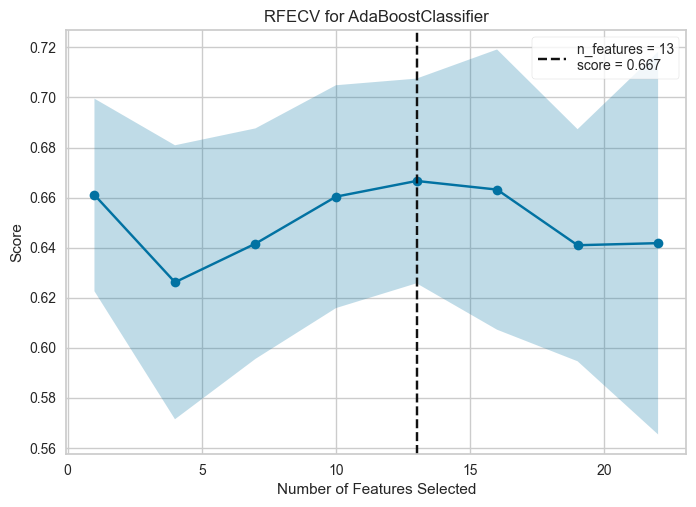

<AxesSubplot: title={'center': 'RFECV for AdaBoostClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [106]:
# Do take note of very long run time!
visualizer.fit(X_train_scaled_pca, y_train)        # Fit the data to the visualizer
visualizer.show() 

In [107]:
X_train_scaled_pca_rfe = visualizer.transform(X_train_scaled_pca)

In [108]:
weights = {0:0.2, 1:1}

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                "base_estimator__splitter" :   ["best", "random"],
                "base_estimator__max_features": randint(1, 9),
                "base_estimator__min_samples_leaf": randint(1, 9),
                "base_estimator__max_depth" : [2,4,6,8,10,12],
                "n_estimators": [1, 2, 5, 10],
                "learning_rate": loguniform(1e-3, 100)
            }

dtc = DecisionTreeClassifier(random_state = 3244, max_features = "auto", class_weight = weights)

dtc_abc = AdaBoostClassifier(random_state=3244, base_estimator = dtc)

random_search_abc = RandomizedSearchCV(dtc_abc, param_grid, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'], n_jobs=-1, cv=cv, random_state=3244, refit='roc_auc')

result_pca_rfe = random_search_abc.fit(X_train_scaled_pca_rfe, y_train.values.ravel())

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision 

In [109]:
cv_results = pd.DataFrame(result_pca_rfe.cv_results_)
max = cv_results['mean_test_roc_auc'].argmax()

print('Best Hyperparameters: %s' % result_pca_rfe.best_params_)

print('Accuracy', cv_results['mean_test_accuracy'][max])
print('Precision', cv_results['mean_test_precision'][max])
print('Recall', cv_results['mean_test_recall'][max])
print('F1', cv_results['mean_test_f1'][max])
print('Roc_Auc', cv_results['mean_test_roc_auc'][max])

Best Hyperparameters: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 10, 'base_estimator__max_features': 6, 'base_estimator__min_samples_leaf': 7, 'base_estimator__splitter': 'best', 'learning_rate': 0.14047694704063493, 'n_estimators': 10}
Accuracy 0.9880672685612668
Precision 0.23197551982663298
Recall 0.2743867243867244
F1 0.2478164826613361
Roc_Auc 0.7068088583023173


# Adaboost-DT + KernelPCA + RFE + SMOTE

Stack Overflow: (1) No, scaling is not necessary for random forests, (2) Random Forest is a tree-based model and hence does not require feature scaling.

In [126]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                "base_estimator__splitter" :   ["best", "random"],
                "base_estimator__max_features": randint(1, 9),
                "base_estimator__min_samples_leaf": randint(1, 9),
                "base_estimator__max_depth" : [2,4,6,8,10,12],
                "n_estimators": [1, 2, 5, 10],
                "learning_rate": loguniform(1e-3, 100),
            }

# SMOTE
sm = SMOTE(random_state = 3244, k_neighbors = 5, sampling_strategy=0.2)
X_train_scaled_pca_rfe_sm, y_train_sm = sm.fit_resample(X_train_scaled_pca_rfe, y_train)    

dtc = DecisionTreeClassifier(random_state = 3244, max_features = "auto", class_weight = weights)

dtc_abc = AdaBoostClassifier(random_state=3244, base_estimator = dtc)

random_search_abc = RandomizedSearchCV(dtc_abc, param_grid, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'], n_jobs=-1, cv=cv, random_state=3244, refit='roc_auc')

result_final = random_search_abc.fit(X_train_scaled_pca_rfe_sm, y_train_sm.values.ravel())

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reach

In [127]:
cv_results = pd.DataFrame(result_final.cv_results_)
max = cv_results['mean_test_roc_auc'].argmax()

print('Best Hyperparameters: %s' % result_final.best_params_)

print('Accuracy', cv_results['mean_test_accuracy'][max])
print('Precision', cv_results['mean_test_precision'][max])
print('Recall', cv_results['mean_test_recall'][max])
print('F1', cv_results['mean_test_f1'][max])
print('Roc_Auc', cv_results['mean_test_roc_auc'][max])

Best Hyperparameters: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 10, 'base_estimator__max_features': 6, 'base_estimator__min_samples_leaf': 7, 'base_estimator__splitter': 'best', 'learning_rate': 0.14047694704063493, 'n_estimators': 10}
Accuracy 0.9622171055151175
Precision 0.8662275273650352
Recall 0.9155919797791844
F1 0.8899910721305413
Roc_Auc 0.9877855505524928


In [128]:

sm = SMOTE(random_state = 3244, k_neighbors = 1, sampling_strategy=1)
X_train_scaled_pca_rfe_sm, y_train_sm = sm.fit_resample(X_train_scaled_pca_rfe, y_train)

random_search_abc = RandomizedSearchCV(dtc_abc, param_grid, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'], n_jobs=-1, cv=cv, random_state=3244, refit='roc_auc')

result_final = random_search_abc.fit(X_train_scaled_pca_rfe_sm, y_train_sm.values.ravel())

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set

In [129]:
cv_results = pd.DataFrame(result_final.cv_results_)
max = cv_results['mean_test_roc_auc'].argmax()

print('Best Hyperparameters: %s' % result_final.best_params_)

print('Accuracy', cv_results['mean_test_accuracy'][max])
print('Precision', cv_results['mean_test_precision'][max])
print('Recall', cv_results['mean_test_recall'][max])
print('F1', cv_results['mean_test_f1'][max])
print('Roc_Auc', cv_results['mean_test_roc_auc'][max])

Best Hyperparameters: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 10, 'base_estimator__max_features': 6, 'base_estimator__min_samples_leaf': 7, 'base_estimator__splitter': 'best', 'learning_rate': 0.14047694704063493, 'n_estimators': 10}
Accuracy 0.9833989934667274
Precision 0.9728865205957112
Recall 0.9945593357264254
F1 0.9835915291237955
Roc_Auc 0.9967119072337304


# Final Test Set

In [130]:
X_test_scaled_pca_rfe = visualizer.transform(X_test_scaled_pca)

In [131]:
print("Final X_test shape: ", X_test_scaled_pca_rfe.shape)
print("Final X_train shape: ", X_train_scaled_pca_rfe_sm.shape)

Final X_test shape:  (7221, 13)
Final X_train shape:  (57346, 13)


Precision:  0.11242603550295859
Recall:  0.3584905660377358
Confusion Matrix:  [[7018  150]
 [  34   19]]
F1 Score:  0.17117117117117117
ROC AUC Score:  0.6687821133760107


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


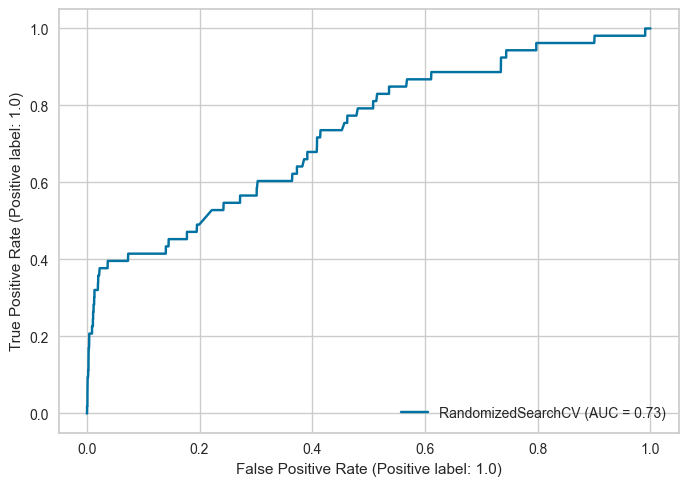

In [132]:
y_pred = random_search_abc.predict(X_test_scaled_pca_rfe)

print("Precision: ", met.precision_score(y_test, y_pred))
print("Recall: ", met.recall_score(y_test, y_pred))
print("Confusion Matrix: ", met.confusion_matrix(y_test, y_pred))
print("F1 Score: ", met.f1_score(y_test, y_pred))
print("ROC AUC Score: ", met.roc_auc_score(y_test, y_pred))
met.plot_roc_curve(random_search_abc, X_test_scaled_pca_rfe, y_test)
plt.show()

In [109]:
type(y_pred)

numpy.ndarray

In [104]:
y_test.value_counts()

REALTYPE
0.0         7168
1.0           53
dtype: int64

# LIME

LIME for AdaBoost + RFE for X_train_scaled_rfe

In [188]:
classes = [0 , 1]

explainer = lime_tabular.LimeTabularExplainer(X_train_scaled_rfe.values, mode="classification",
                                              feature_selection= 'auto',
                                              class_names=classes,
                                              feature_names=X_train_scaled_rfe.columns
                                             )

idx = int(10)


explanation = explainer.explain_instance(X_test_scaled_rfe.iloc[idx], rfe_random_search_abc.predict_proba,
                                         num_features=len(X_train_scaled_rfe.columns))

explanation.show_in_notebook()

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


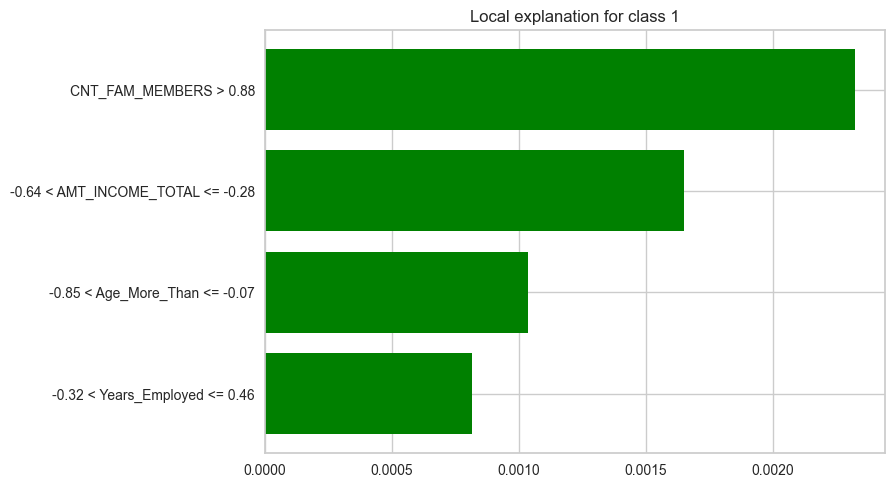

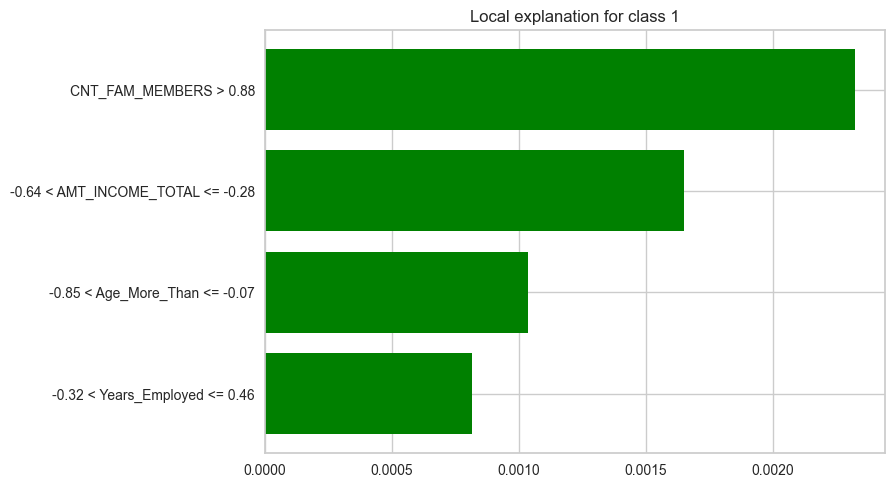

In [180]:
explanation.as_pyplot_figure()

LIME for AdaBoost for X_train

In [186]:
classes = [0 , 1]

explainer = lime_tabular.LimeTabularExplainer(X_train.values, mode="classification",
                                              feature_selection= 'auto',
                                              class_names=classes,
                                              feature_names=X_train.columns
                                             )

idx = int(20)


explanation = explainer.explain_instance(X_test.iloc[idx], simple_random_search_abc.predict_proba,
                                         num_features=len(X_train.columns))

explanation.show_in_notebook()

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


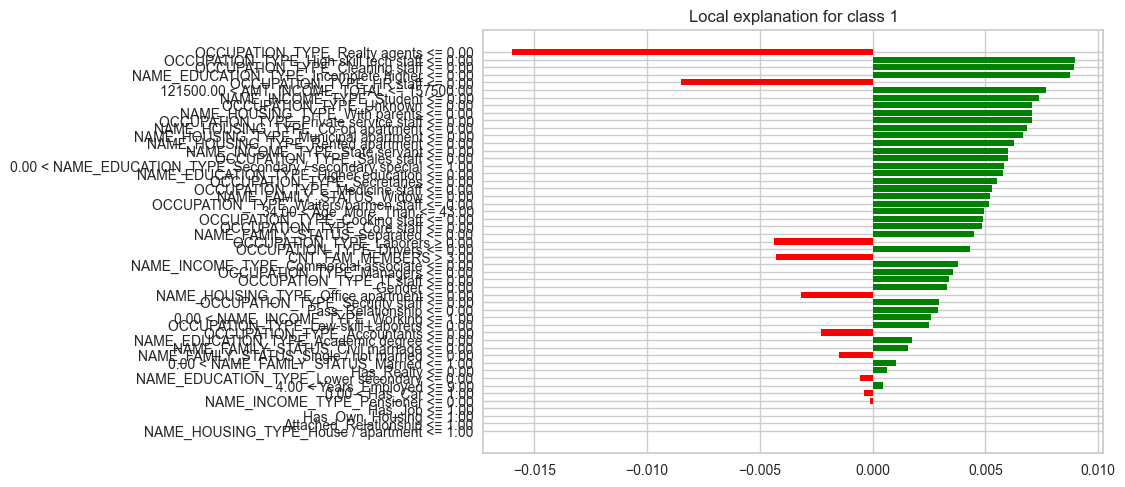

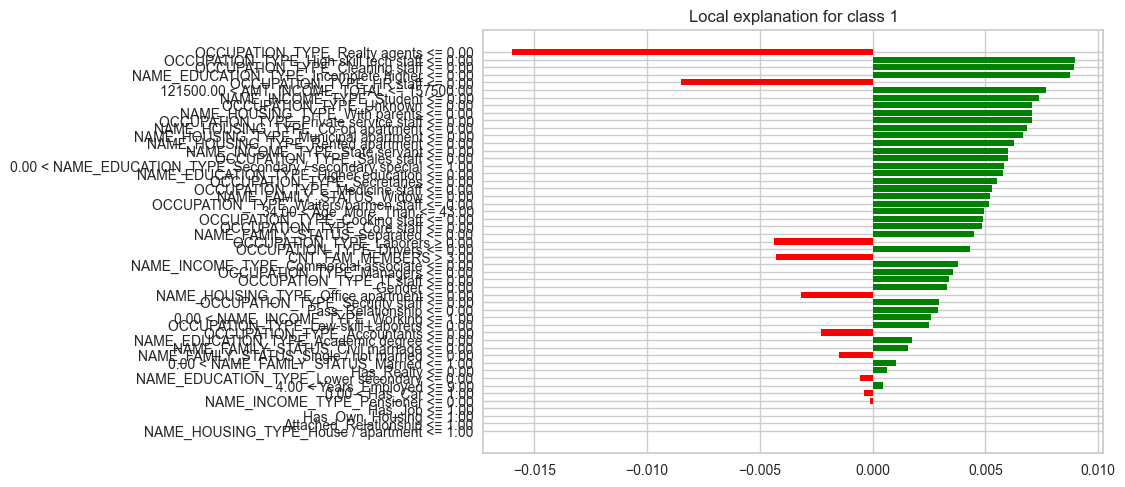

In [168]:
explanation.as_pyplot_figure()